## 로이터 데이터셋

1986년에 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합인 로이터 데이터셋을 사용하겠습니다. 이 데이터셋은 텍스트 분류를 위해 널리 사용되는 간단한 데이터셋입니다. 46개의 토픽이 있으며 어떤 토픽은 다른 것에 비해 데이터가 많습니다. 각 토픽은 훈련 세트에 최소한 10개의 샘플을 가지고 있습니다.


[과제] 로이터 데이터셋을 불러와서 아래 사항을 참조하여 다중분류를 keras 신경망 모델을 이용하여 수행하세요.
- 데이터 벡터화
- 모델 구성 : input_shape = 10000, 출력 layer 활성화 함수 = softmax
- epochs 20으로 훈련 및 검증 결과를 시각화 후 과대적합이 시작되는 epoch확인하여 기술

In [ ]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [ ]:
print(train_data.shape,test_data.shape)

(8982,) (2246,)


In [ ]:
import pandas as pd
pd.Series(train_labels).value_counts()

3     3159
4     1949
19     549
16     444
1      432
11     390
20     269
13     172
8      139
10     124
9      101
21     100
25      92
2       74
18      66
24      62
0       55
34      50
12      49
36      49
28      48
6       48
30      45
23      41
31      39
17      39
40      36
32      32
41      30
14      26
39      24
26      24
43      21
15      20
37      19
38      19
29      19
45      18
5       17
7       16
27      15
22      15
42      13
44      12
33      11
35      10
dtype: int64

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

In [ ]:
# def to_one_hot(labels, dimension=46):
#     results = np.zeros((len(labels), dimension))
#     for i, label in enumerate(labels):
#         results[i, label] = 1.
#     return results

# # 훈련 레이블 벡터 변환
# one_hot_train_labels = to_one_hot(train_labels)
# # 테스트 레이블 벡터 변환
# one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
# 케라스 내장 원핫인코딩 함수
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 65ms/step - loss: 2.6361 - accuracy: 0.5219 - val_loss: 1.7238 - val_accuracy: 0.6420
Epoch 2/20
16/16 [==============================] - 1s 54ms/step - loss: 1.3941 - accuracy: 0.7191 - val_loss: 1.2765 - val_accuracy: 0.7230
Epoch 3/20
16/16 [==============================] - 1s 51ms/step - loss: 1.0217 - accuracy: 0.7838 - val_loss: 1.1029 - val_accuracy: 0.7570
Epoch 4/20
16/16 [==============================] - 1s 51ms/step - loss: 0.7949 - accuracy: 0.8324 - val_loss: 1.0612 - val_accuracy: 0.7580
Epoch 5/20
16/16 [==============================] - 1s 55ms/step - loss: 0.6357 - accuracy: 0.8676 - val_loss: 0.9446 - val_accuracy: 0.8060
Epoch 6/20
16/16 [==============================] - 1s 54ms/step - loss: 0.5041 - accuracy: 0.8958 - val_loss: 0.9244 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 1s 52ms/step - loss: 0.4020 - accuracy: 0.9162 - val_loss: 0.9322 - val_accuracy: 0.8080
Epoch 8/20
16

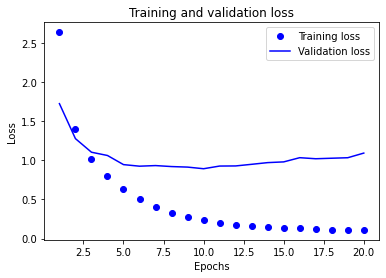

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

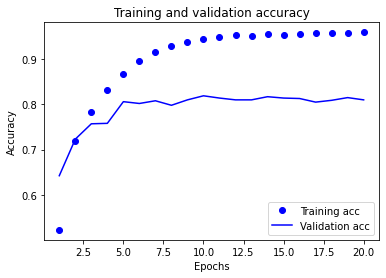

In [ ]:
plt.clf()   # 그래프를 초기화합니다

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# epochs 10 정도부터 Validation loss와 Validation accuracy가 늘어나므로 최종 epochs는 9로 결정
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=10,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/10
16/16 [==============================] - 1s 59ms/step - loss: 2.6013 - accuracy: 0.5367 - val_loss: 1.7651 - val_accuracy: 0.6420
Epoch 2/10
16/16 [==============================] - 1s 49ms/step - loss: 1.4468 - accuracy: 0.7055 - val_loss: 1.3217 - val_accuracy: 0.7130
Epoch 3/10
16/16 [==============================] - 1s 48ms/step - loss: 1.0681 - accuracy: 0.7746 - val_loss: 1.1479 - val_accuracy: 0.7690
Epoch 4/10
16/16 [==============================] - 1s 48ms/step - loss: 0.8381 - accuracy: 0.8240 - val_loss: 1.0516 - val_accuracy: 0.7720
Epoch 5/10
16/16 [==============================] - 1s 47ms/step - loss: 0.6670 - accuracy: 0.8631 - val_loss: 0.9836 - val_accuracy: 0.7980
Epoch 6/10
16/16 [==============================] - 1s 48ms/step - loss: 0.5296 - accuracy: 0.8968 - val_loss: 0.9480 - val_accuracy: 0.8080
Epoch 7/10
16/16 [==============================] - 1s 48ms/step - loss: 0.4278 - accuracy: 0.9161 - val_loss: 0.9228 - val_accuracy: 0.8150
Epoch 8/10
16

In [ ]:
results

[1.018483281135559, 0.7889581322669983]

[과제] 유닛수를 32개, 128개로 조정하고 한개의 은닉층을 세 개의 은닉층으로 변경하여 학습 및 평가 수행한 후 그 차이를 논하세요. 

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

In [ ]:
# 케라스 내장 원핫인코딩 함수
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 62ms/step - loss: 3.3382 - accuracy: 0.3411 - val_loss: 2.5732 - val_accuracy: 0.5450
Epoch 2/20
16/16 [==============================] - 1s 40ms/step - loss: 2.1354 - accuracy: 0.5539 - val_loss: 1.8237 - val_accuracy: 0.5660
Epoch 3/20
16/16 [==============================] - 1s 39ms/step - loss: 1.6291 - accuracy: 0.5956 - val_loss: 1.5612 - val_accuracy: 0.6060
Epoch 4/20
16/16 [==============================] - 1s 39ms/step - loss: 1.3641 - accuracy: 0.6734 - val_loss: 1.4169 - val_accuracy: 0.6740
Epoch 5/20
16/16 [==============================] - 1s 39ms/step - loss: 1.1900 - accuracy: 0.7141 - val_loss: 1.3235 - val_accuracy: 0.6840
Epoch 6/20
16/16 [==============================] - 1s 40ms/step - loss: 1.0509 - accuracy: 0.7409 - val_loss: 1.2620 - val_accuracy: 0.7110
Epoch 7/20
16/16 [==============================] - 1s 41ms/step - loss: 0.9230 - accuracy: 0.7769 - val_loss: 1.2013 - val_accuracy: 0.7360
Epoch 8/20
16

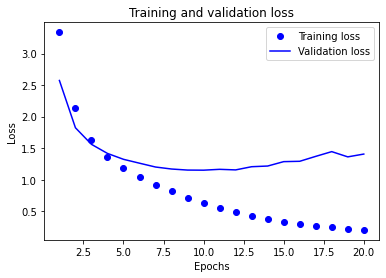

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

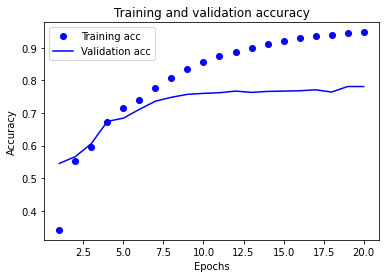

In [ ]:
plt.clf() 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# 정확도와 로스율을 살펴보니 9정도의 epochs가 적당함
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 51ms/step - loss: 3.0025 - accuracy: 0.4559 - val_loss: 2.1673 - val_accuracy: 0.5720
Epoch 2/9
16/16 [==============================] - 1s 38ms/step - loss: 1.8510 - accuracy: 0.6151 - val_loss: 1.6429 - val_accuracy: 0.6240
Epoch 3/9
16/16 [==============================] - 1s 37ms/step - loss: 1.4771 - accuracy: 0.6749 - val_loss: 1.4370 - val_accuracy: 0.6840
Epoch 4/9
16/16 [==============================] - 1s 38ms/step - loss: 1.2739 - accuracy: 0.7088 - val_loss: 1.3101 - val_accuracy: 0.6990
Epoch 5/9
16/16 [==============================] - 1s 36ms/step - loss: 1.1077 - accuracy: 0.7468 - val_loss: 1.2525 - val_accuracy: 0.7050
Epoch 6/9
16/16 [==============================] - 1s 36ms/step - loss: 0.9755 - accuracy: 0.7850 - val_loss: 1.1625 - val_accuracy: 0.7430
Epoch 7/9
16/16 [==============================] - 1s 37ms/step - loss: 0.8622 - accuracy: 0.8102 - val_loss: 1.1315 - val_accuracy: 0.7530
Epoch 8/9
16/16 [===

In [ ]:
# 64개의 유닛을 가진 은닉층보다 정확도가 낮아졌다
results

[1.1897279024124146, 0.7435441017150879]

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 93ms/step - loss: 2.2529 - accuracy: 0.4773 - val_loss: 1.5105 - val_accuracy: 0.6610
Epoch 2/20
16/16 [==============================] - 1s 85ms/step - loss: 1.2903 - accuracy: 0.7010 - val_loss: 1.1912 - val_accuracy: 0.7290
Epoch 3/20
16/16 [==============================] - 1s 79ms/step - loss: 0.9577 - accuracy: 0.7755 - val_loss: 1.0572 - val_accuracy: 0.7580
Epoch 4/20
16/16 [==============================] - 1s 81ms/step - loss: 0.7039 - accuracy: 0.8348 - val_loss: 0.9912 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 1s 82ms/step - loss: 0.5299 - accuracy: 0.8770 - val_loss: 0.9905 - val_accuracy: 0.7850
Epoch 6/20
16/16 [==============================] - 1s 81ms/step - loss: 0.3856 - accuracy: 0.9137 - val_loss: 1.1363 - val_accuracy: 0.7620
Epoch 7/20
16/16 [==============================] - 1s 81ms/step - loss: 0.3122 - accuracy: 0.9292 - val_loss: 1.0212 - val_accuracy: 0.8040
Epoch 8/20
16

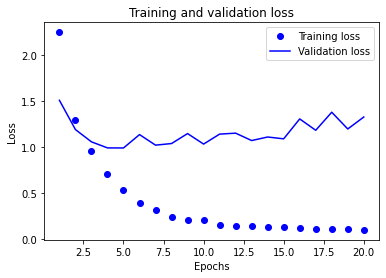

In [ ]:
# 로스율과 정확도가 너무 왔다갔다함
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

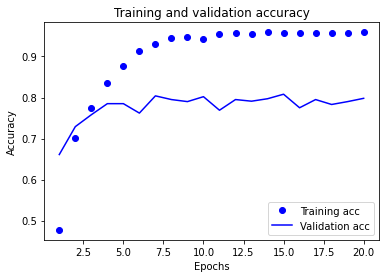

In [ ]:
plt.clf()   # 그래프를 초기화합니다

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# 그대로 epochs 7이 제일 나아보이니 7로 설정
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=7,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/7
16/16 [==============================] - 2s 95ms/step - loss: 2.2650 - accuracy: 0.4723 - val_loss: 1.5138 - val_accuracy: 0.6490
Epoch 2/7
16/16 [==============================] - 1s 82ms/step - loss: 1.2826 - accuracy: 0.7048 - val_loss: 1.2113 - val_accuracy: 0.7200
Epoch 3/7
16/16 [==============================] - 1s 91ms/step - loss: 0.9457 - accuracy: 0.7734 - val_loss: 1.0535 - val_accuracy: 0.7680
Epoch 4/7
16/16 [==============================] - 1s 81ms/step - loss: 0.6976 - accuracy: 0.8343 - val_loss: 1.0388 - val_accuracy: 0.7760
Epoch 5/7
16/16 [==============================] - 1s 83ms/step - loss: 0.5571 - accuracy: 0.8661 - val_loss: 1.0840 - val_accuracy: 0.7710
Epoch 6/7
16/16 [==============================] - 1s 82ms/step - loss: 0.3730 - accuracy: 0.9139 - val_loss: 1.0644 - val_accuracy: 0.7700
Epoch 7/7
16/16 [==============================] - 1s 88ms/step - loss: 0.3170 - accuracy: 0.9307 - val_loss: 1.0314 - val_accuracy: 0.8020


In [ ]:
# 정확도는 0.77 준수한거 같음
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 1s 7ms/step - loss: 1.1186 - accuracy: 0.7796
